**Importing Libraries**

In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.axes as ax

**Loading Data**

In [2]:
data=pd.read_csv("data_for_lr.csv")

In [3]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [5]:
data.isnull().sum()

x    0
y    1
dtype: int64

**Data Processing  For NULL values**

In [6]:
data=data.dropna()
print("Shape of the data: ",data.shape)

Shape of the data:  (699, 2)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


**Spliting the data**

In [9]:
#Trainging input and output
train_input=np.array(data.x[0:500]).reshape(500,1)
train_output=np.array(data.y[0:500]).reshape(500,1)

#Validation data input and output
test_input=np.array(data.x[500:700]).reshape(199,1)
test_output=np.array(data.y[500:700]).reshape(199,1)



In [10]:
print(f"Training input data  shape= {train_input.shape}")
print(f"Training output data shape= {train_output.shape}")
print(f"Training input data shape = {test_input.shape}")
print(f"Training output data shape= {test_output.shape}")

Training input data  shape= (500, 1)
Training output data shape= (500, 1)
Training input data shape = (199, 1)
Training output data shape= (199, 1)


<font color="green">Linear Regression </font>

**Forward Propogation**

f(x)=m*x+c

In [13]:
def forward_propogation(train_input,parameter):
    m=parameter["m"]
    c=parameter["c"]
    predictions=np.multiply(m,train_input)+c
    return predictions

**Cost Functions**

summation(1/2n*(y-f(x))^2)

In [14]:
def cost_function(predictions,train_output):
    cost=np.mean((train_output-predictions)**2)*0.5
    return cost

**Gradient Descent for BackPropagation**

df=f(x)-y

dm=df*x

dc=df*1

In [15]:
def backward_propagation(train_input,train_output,predictions):
    derivatives=dict()
    df=predictions-train_output
    dm=np.mean(np.multiply(df,train_input))
    dc=np.mean(df)
    
    derivatives["dm"]=dm
    derivatives["dc"]=dc
    
    return derivatives


**Updating parameters**

m=m-(learning_rate * dm)

c=c-(learning_rate * dc)

In [16]:
def update_parameters(parameters,derivatives,learning_rate):
    parameters['m'] = parameters["m"] - learning_rate * derivatives['dm']
    parameters['c'] = parameters["c"] - learning_rate * derivatives['dc']
    return parameters

**Model Training**

In [18]:
def train(train_input,train_output,learning_rate,iters):
    #random parameters
    parameters=dict()
    parameters['m']=np.random.uniform(0,1)
    parameters["c"]=np.random.uniform(0,1)
    
    plt.figure()
    
    #Loss
    loss=list()
    
    
    #Iteration
    for i in range(iters):
        #Forward propogation
        predictions=forward_propogation(train_input,parameters)
        
        #cost
        cost=cost_function(predictions,train_output)
        
        loss.append(cost)
        print(f"Iteration = {i +1},Loss= {cost}")
        
        #plot
        fig, ax=plt.subplots()
        ax.plot(train_input,train_output,"+",label="Original")
        ax.plot(train_input,predictions,"+",label="Training")
        
        legend=ax.legend()
        
        plt.plot(train_input,train_output,"+",label="Original")
        plt.plot(train_input,predictions,"+",label="Training")
        plt.show()
        
        
        #back propogation
        derivatives=backward_propagation(train_input,train_output,predictions)
        
        #update the paramters
        parameters=update_parameters(parameters,derivatives,learning_rate)
        
    return parameters

**Training**

Iteration = 1,Loss= 118.18689748651404


<Figure size 640x480 with 0 Axes>

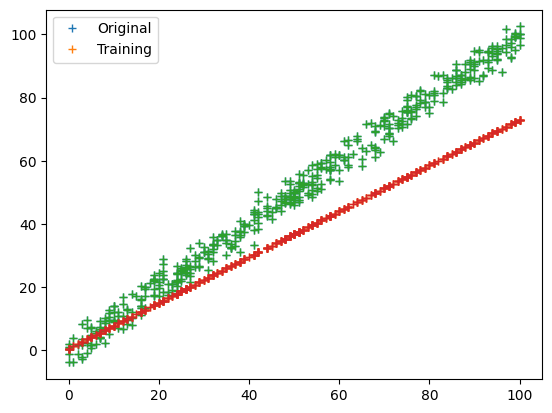

Iteration = 2,Loss= 589.4750225348627


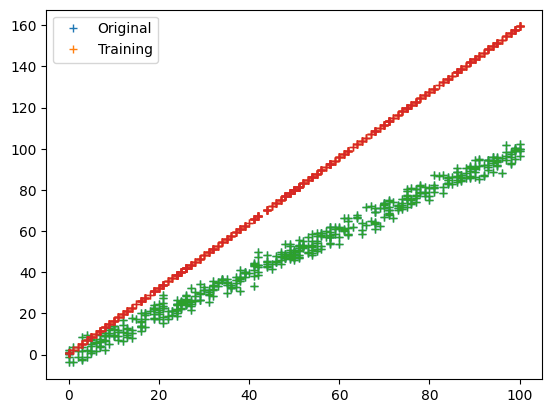

Iteration = 3,Loss= 3005.7227944073975


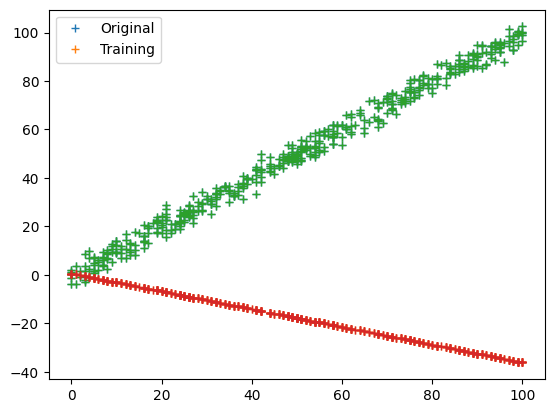

Iteration = 4,Loss= 15393.586335662974


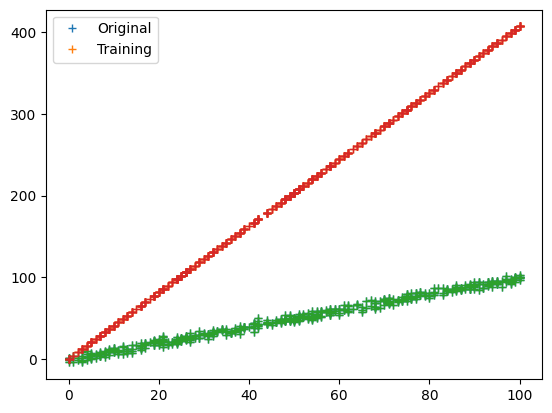

Iteration = 5,Loss= 78904.937819313


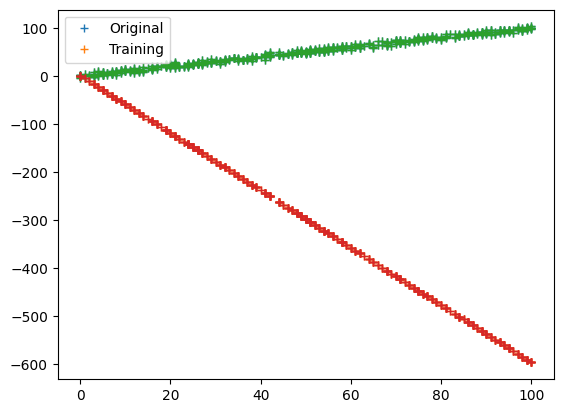

Iteration = 6,Loss= 404521.35630969104


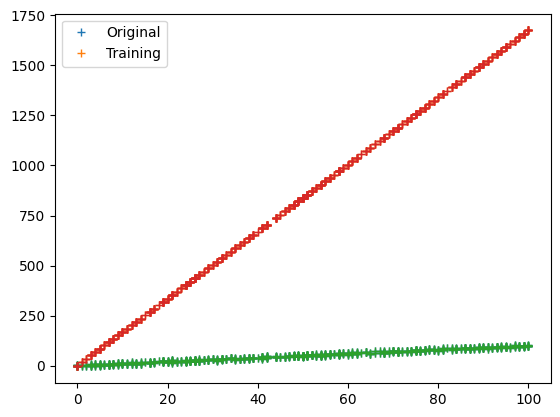

Iteration = 7,Loss= 2073924.5334036308


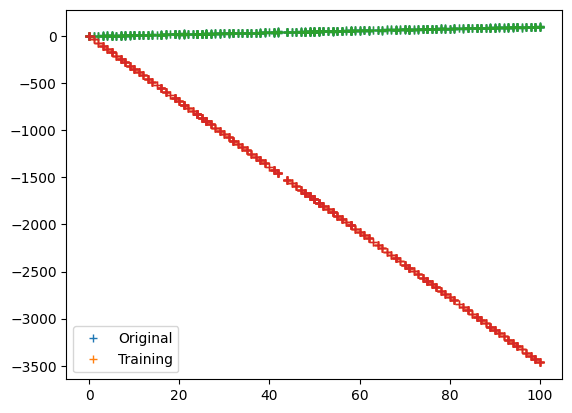

Iteration = 8,Loss= 10632789.532889584


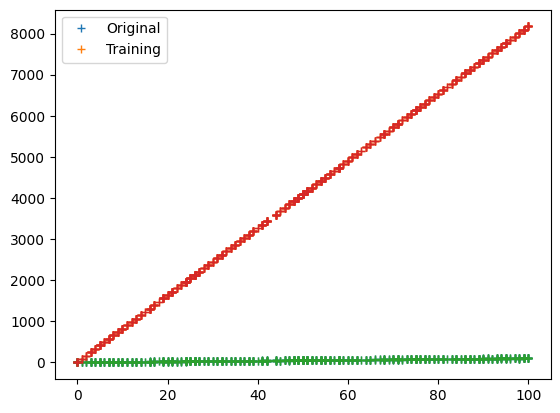

Iteration = 9,Loss= 54513243.98718012


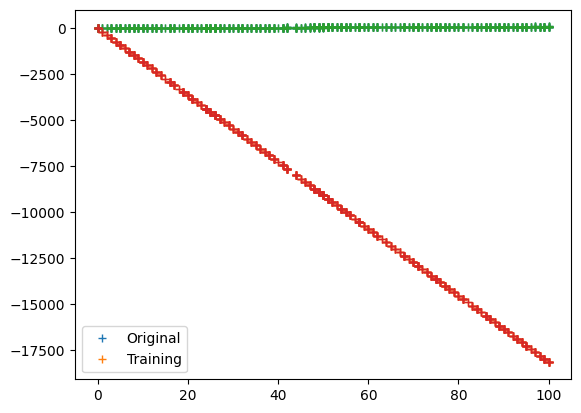

Iteration = 10,Loss= 279483994.574441


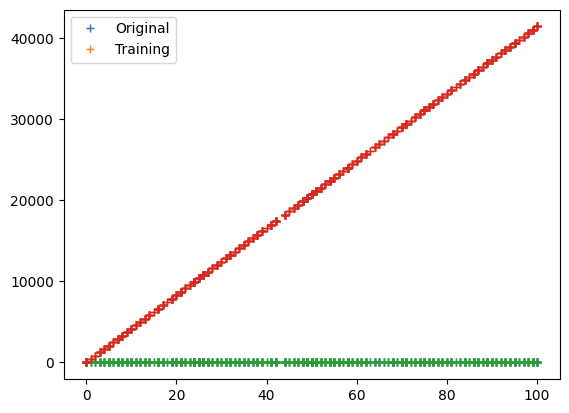

Iteration = 11,Loss= 1432886785.1605754


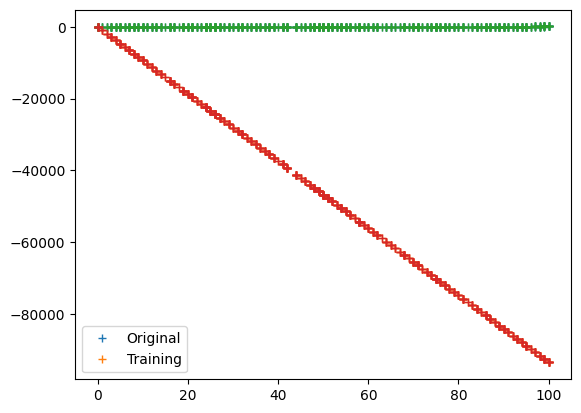

Iteration = 12,Loss= 7346268830.86667


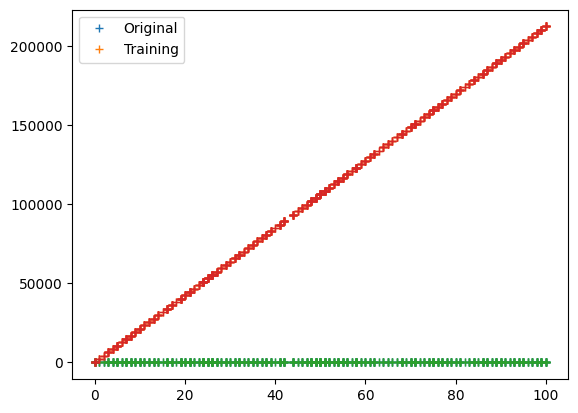

Iteration = 13,Loss= 37663593796.50892


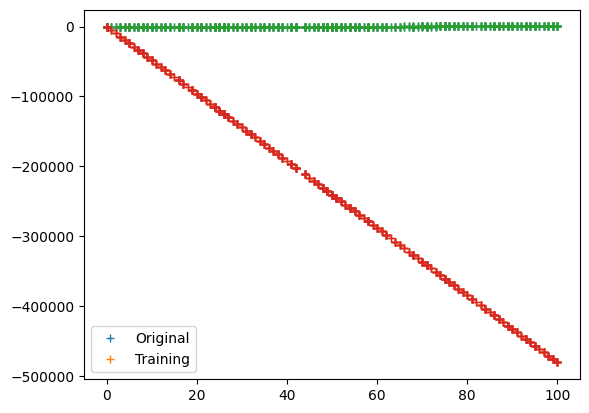

Iteration = 14,Loss= 193097520772.31955


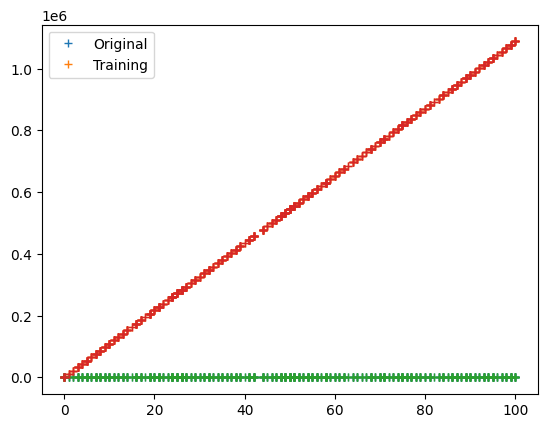

Iteration = 15,Loss= 989991893296.9772


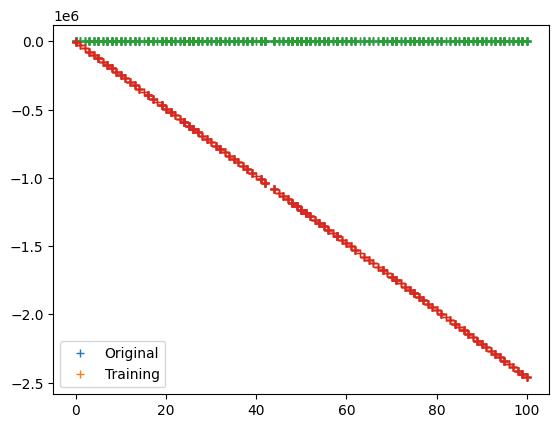

Iteration = 16,Loss= 5075590535222.142


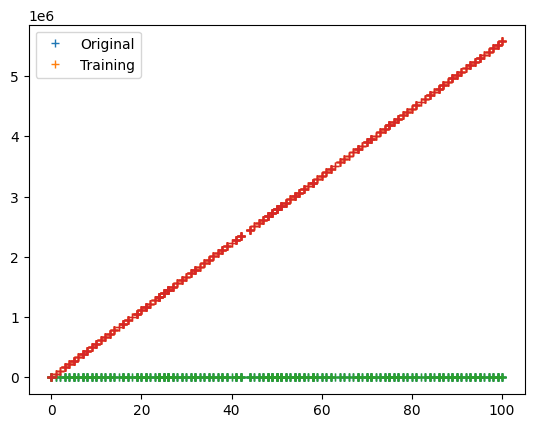

Iteration = 17,Loss= 26022050741758.84


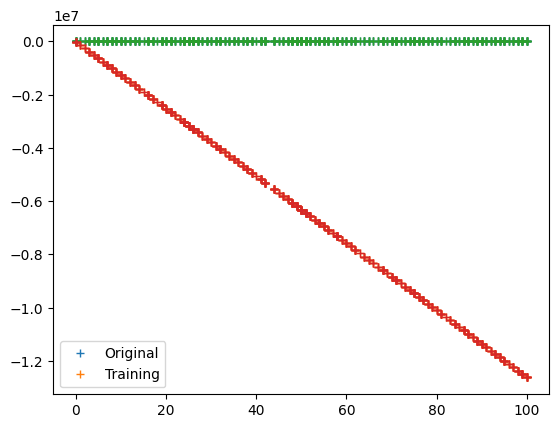

Iteration = 18,Loss= 133412480795671.55


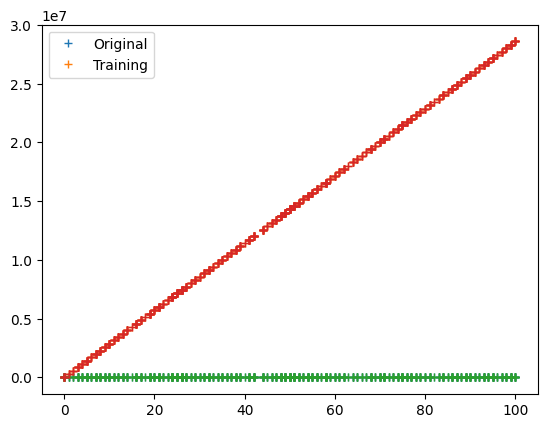

Iteration = 19,Loss= 683992595690948.5


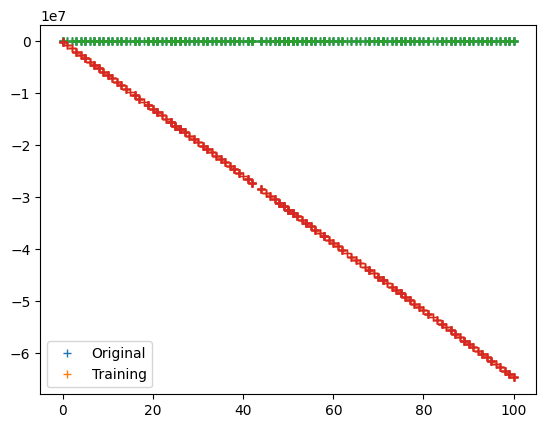

Iteration = 20,Loss= 3506762397114716.0


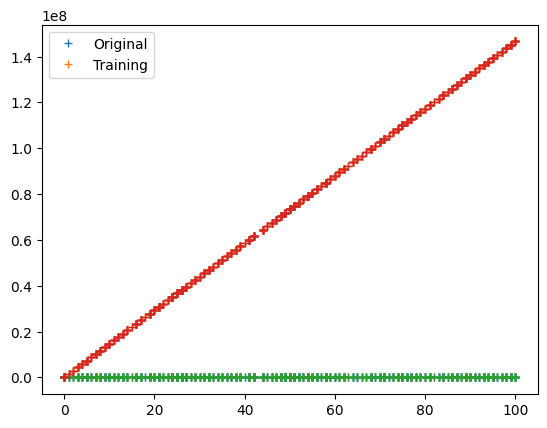

In [19]:
parameters,loss=train(train_input,train_output,0.001,20)